This is the Notebook used to clean, analyze, and visualize the data presented in our paper: 
# **Vision-Cognition: A tool to measure human occlusion reasoning**

This notebook was written and tested using:    
<a href="www.colab.research.google.com">Google Colab<a/>  

## Recommendations: 

- Make sure that the filename paths of the .csv files match whatever setup you are using. Foor Google Colab, the .csv are located within the same directory as the Jupyter Notebook. For example,you only need to write the following in Colab:

```python
pd.read_csv("foobar.csv")
```
if you want to read the file ```foobar.csv``` into a pandas dataframe. 



In [27]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np


data_task = pd.read_csv("task_0.csv") 

data_task

,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration
0,1,2,1,5,92,84,5,4,4,24597
1,2,8,1,5,100,96,10,1,0,13210
2,3,6,1,5,100,92,9,1,7,20258
3,4,11,1,5,90,82,12,5,5,21057
4,5,9,2,10,82,72,5,4,4,26513
...,...,...,...,...,...,...,...,...,...,...
5463,5464,5753,8,80,28,28,811,3,3,3741
5464,5465,5754,9,100,13,13,811,7,7,4599
5465,5466,5755,10,200,0,-2,811,4,4,6247
5466,5467,5756,1,5,80,52,812,1,1,71476


In [28]:
#add a column for the uncovered mask (inverse of remaining mask)

data_task['uncovered_mask'] = 100 - data_task['remaining_mask']
data_task

,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration,uncovered_mask
0,1,2,1,5,92,84,5,4,4,24597,8
1,2,8,1,5,100,96,10,1,0,13210,0
2,3,6,1,5,100,92,9,1,7,20258,0
3,4,11,1,5,90,82,12,5,5,21057,10
4,5,9,2,10,82,72,5,4,4,26513,18
...,...,...,...,...,...,...,...,...,...,...,...
5463,5464,5753,8,80,28,28,811,3,3,3741,72
5464,5465,5754,9,100,13,13,811,7,7,4599,87
5465,5466,5755,10,200,0,-2,811,4,4,6247,100
5466,5467,5756,1,5,80,52,812,1,1,71476,20


In [29]:
data_user = pd.read_csv("user_0.csv") 

data_user

,unique_id,tasks_submitted,is_turker,assignmentId,device,hitId,workerId,turkSubmitTo,finished_HIT,is_compensated
0,1,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
1,2,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
2,3,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
3,4,10,1,30LB5CDZNI8SO2AGZBKMT17SCGRZ0K,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1JCKICNOC7DAB,https://www.mturk.com,1,0
4,5,10,1,3OS4RQUCRFDN38MQWFN4AQNTRFVBFV,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A2G5GGLXD2KSZS,https://www.mturk.com,1,0
...,...,...,...,...,...,...,...,...,...,...
807,808,10,1,3VNL7UK1XLHNZUG7W1EPAKTFY5QTF1,touchpad,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AOSB3RSWQQENC,https://www.mturk.com,1,0
808,809,10,1,384PI804XYZVNQO24JQEX8APQLP0SJ,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1QX5V431K1J9Q,https://www.mturk.com,0,0
809,810,10,1,384PI804XYZVNQO24JQEX8APQLP0SJ,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1QX5V431K1J9Q,https://www.mturk.com,0,0
810,811,10,1,36AHBNMV1XAMIW15F16YU1I91VXDY6,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A3B145X2QA8FWA,https://www.mturk.com,1,0


In [30]:
# removed non turker users
data_user = data_user[data_user.is_turker !=0]

data_user

,unique_id,tasks_submitted,is_turker,assignmentId,device,hitId,workerId,turkSubmitTo,finished_HIT,is_compensated
0,1,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
1,2,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
2,3,10,1,3Z7ISHFUH6TA6RFJUFX1MGDAVE48ZH,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A84KYYIRZ3K00,https://www.mturk.com,0,0
3,4,10,1,30LB5CDZNI8SO2AGZBKMT17SCGRZ0K,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1JCKICNOC7DAB,https://www.mturk.com,1,0
4,5,10,1,3OS4RQUCRFDN38MQWFN4AQNTRFVBFV,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A2G5GGLXD2KSZS,https://www.mturk.com,1,0
...,...,...,...,...,...,...,...,...,...,...
807,808,10,1,3VNL7UK1XLHNZUG7W1EPAKTFY5QTF1,touchpad,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AOSB3RSWQQENC,https://www.mturk.com,1,0
808,809,10,1,384PI804XYZVNQO24JQEX8APQLP0SJ,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1QX5V431K1J9Q,https://www.mturk.com,0,0
809,810,10,1,384PI804XYZVNQO24JQEX8APQLP0SJ,NaN,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1QX5V431K1J9Q,https://www.mturk.com,0,0
810,811,10,1,36AHBNMV1XAMIW15F16YU1I91VXDY6,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A3B145X2QA8FWA,https://www.mturk.com,1,0


In [31]:
# remove users who did not finish the hit
data_user = data_user[data_user.finished_HIT !=0]
data_user



,unique_id,tasks_submitted,is_turker,assignmentId,device,hitId,workerId,turkSubmitTo,finished_HIT,is_compensated
3,4,10,1,30LB5CDZNI8SO2AGZBKMT17SCGRZ0K,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1JCKICNOC7DAB,https://www.mturk.com,1,0
4,5,10,1,3OS4RQUCRFDN38MQWFN4AQNTRFVBFV,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A2G5GGLXD2KSZS,https://www.mturk.com,1,0
8,9,10,1,3QAPZX2QNAB2IR74A4B86QXLR7T20G,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AGWCCAEFV29X2,https://www.mturk.com,1,0
10,11,10,1,3QRYMNZ7F4FZNMTOUPX2IP2OZDGTN9,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1WF1X8PQQJ2OQ,https://www.mturk.com,1,0
11,12,10,1,3E7TUJ2EGIK7HVTX7PEIVKPIR2C9D8,touchpad,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A1QXU4Q3CK75FK,https://www.mturk.com,1,0
...,...,...,...,...,...,...,...,...,...,...
804,805,10,1,3T111IHZ5KO1I5C2PQ92096M7M4R90,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,A3CKTW6VXFXGBQ,https://www.mturk.com,1,0
805,806,10,1,3O6CYIULEJZ4ATHRMVEZJ41HCMMUWQ,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AAJ121M08S5KD,https://www.mturk.com,1,0
806,807,10,1,3LEP4MGT3MYQ5O8U59SEMQK8GLADBK,mouse,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AIIHUC6DCPZAR,https://www.mturk.com,1,0
807,808,10,1,3VNL7UK1XLHNZUG7W1EPAKTFY5QTF1,touchpad,3IH9TRB0GGX4DH8U5OVZJRRQKEKI1O,AOSB3RSWQQENC,https://www.mturk.com,1,0


In [32]:
#list that contains the valid users
valid_users = data_user['unique_id'].tolist()
print("Number of valid users who finished the HIT: ")
len(valid_users)

Number of valid users who finished the HIT: 


501

In [33]:
# remove task data from users who did not finish th hit
data_task = data_task[data_task['user_id'].isin(valid_users)]
data_task


,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration,uncovered_mask
0,1,2,1,5,92,84,5,4,4,24597,8
2,3,6,1,5,100,92,9,1,7,20258,0
3,4,11,1,5,90,82,12,5,5,21057,10
4,5,9,2,10,82,72,5,4,4,26513,18
5,6,18,2,10,100,96,9,6,1,13265,0
...,...,...,...,...,...,...,...,...,...,...,...
5461,5462,5751,6,40,40,38,811,2,2,7040,60
5462,5463,5752,7,50,14,12,811,5,5,8649,86
5463,5464,5753,8,80,28,28,811,3,3,3741,72
5464,5465,5754,9,100,13,13,811,7,7,4599,87


In [34]:
# get task ids from the usrs who finished th hit to get the corresponding mouse data
valid_task_ids = data_task['unique_id'].tolist()

In [35]:
# Mouse positions with click, 44 csv files

mouse_positions_with_click_pd = pd.read_csv('mouse__position_with__click_0.csv')
for i in range(44):
  temp_pd = pd.read_csv('mouse__position_with__click_'+str(i+1)+'.csv')
  mouse_positions_with_click_pd = pd.concat([mouse_positions_with_click_pd,temp_pd])
mouse_positions_with_click_pd

,unique_id,task_id,timestamp,mouse_X,mouse_Y,center_X,center_Y,diameter,occlusion_square_id
0,1,1,2145,181.444,97.8021,180,95,5,2900
1,2,1,2163,160.444,124.8020,160,120,5,2585
2,3,1,2214,135.444,184.8020,135,180,5,2197
3,4,1,2234,135.444,196.8020,135,195,5,2200
4,5,1,2248,147.444,211.8020,145,210,5,2363
...,...,...,...,...,...,...,...,...,...
11021,947448,5468,17973,331.625,173.6050,330,170,10,1338
11022,947449,5468,18008,255.625,270.6050,250,270,10,1028
11023,947450,5468,18074,238.625,290.6050,230,290,10,950
11024,947451,5468,18123,238.625,275.6050,230,270,10,948


In [36]:
# remove unnecesary data from data frame (i.e from users who did not finish the HIT) based on thee filter task ids
# mouse_positions_with_click_pd_1
mouse_positions_with_click_pd = mouse_positions_with_click_pd[mouse_positions_with_click_pd['task_id'].isin(valid_task_ids)]
mouse_positions_with_click_pd

,unique_id,task_id,timestamp,mouse_X,mouse_Y,center_X,center_Y,diameter,occlusion_square_id
0,1,1,2145,181.444,97.8021,180,95,5,2900
1,2,1,2163,160.444,124.8020,160,120,5,2585
2,3,1,2214,135.444,184.8020,135,180,5,2197
3,4,1,2234,135.444,196.8020,135,195,5,2200
4,5,1,2248,147.444,211.8020,145,210,5,2363
...,...,...,...,...,...,...,...,...,...
9323,945750,5465,1467,26.000,330.0000,0,300,100,4
9324,945751,5466,382,178.000,145.0000,0,0,200,1
9325,945752,5466,982,247.000,211.0000,200,200,200,4
9326,945753,5466,2232,165.000,255.0000,0,200,200,2


In [37]:
# sort by timstamp for ease of use
mouse_positions_with_click_pd = mouse_positions_with_click_pd.sort_values(by='timestamp')
mouse_positions_with_click_pd

,unique_id,task_id,timestamp,mouse_X,mouse_Y,center_X,center_Y,diameter,occlusion_square_id
4805,898912,5197,27,172.000,93.2500,160,80,40,43
10285,820015,4774,37,110.500,145.3590,96,144,16,160
10286,820016,4774,54,113.500,147.3590,112,144,16,185
18377,533076,3132,74,300.500,11.3594,300,0,20,301
18378,533077,3132,89,292.500,11.3594,280,0,20,281
...,...,...,...,...,...,...,...,...,...
14154,823884,4792,288278,201.917,320.7000,200,320,5,3265
14155,823885,4792,288689,161.917,292.7000,160,290,5,2619
14156,823886,4792,289138,148.917,287.7000,145,285,5,2378
14157,823887,4792,289545,148.917,313.7000,145,310,5,2383


In [38]:
# Mouse positions without click, 32 csv files

mouse_positions_without_click_pd = pd.read_csv('mouse__position_without__click_0.csv')
for i in range(32):
  temp_pd = pd.read_csv('mouse__position_without__click_'+str(i+1)+'.csv')
  mouse_positions_without_click_pd = pd.concat([mouse_positions_without_click_pd,temp_pd])
# mouse_positions_with_click_pd_1
mouse_positions_without_click_pd 

,unique_id,task_id,timestamp,mouse_X,mouse_Y
0,1,1,1360,242.444,366.802000
1,2,1,1376,242.444,366.802000
2,3,1,1392,242.444,366.802000
3,4,1,1412,242.444,366.802000
4,5,1,1427,242.444,366.802000
...,...,...,...,...,...
6702,979705,5468,18339,135.625,56.605500
6703,979706,5468,18356,127.625,37.605500
6704,979707,5468,18373,122.625,23.605500
6705,979708,5468,18390,120.625,11.605500


In [39]:
# remove unnecesary data from data frame (i.e from users who did not finish the HIT) based on thee filtered task ids
# mouse_positions_without_click_pd
mouse_positions_without_click_pd = mouse_positions_without_click_pd[mouse_positions_without_click_pd['task_id'].isin(valid_task_ids)]
mouse_positions_without_click_pd

,unique_id,task_id,timestamp,mouse_X,mouse_Y
0,1,1,1360,242.444,366.802
1,2,1,1376,242.444,366.802
2,3,1,1392,242.444,366.802
3,4,1,1412,242.444,366.802
4,5,1,1427,242.444,366.802
...,...,...,...,...,...
6605,979608,5466,3332,283.000,97.000
6606,979609,5466,3348,283.000,78.000
6607,979610,5466,3365,283.000,60.000
6608,979611,5466,3382,281.000,41.000


In [40]:
# Get a list of all users
actual_users = data_user.unique_id.tolist()
actual_users
for user in actual_users[0:2]:
  print('------------------------------------------------------------------')
  print('User: {}'.format(user))
  user_task_data = data_task[data_task.user_id == user]
  print("Number of tasks {}".format(user_task_data.shape[0]))
  print('Tasks Submitted Info: ')
  for (tasknumber,row) in user_task_data.iterrows():
    print('---------------------------------')
    print('Task: {}'.format(row.unique_id)) 
    print(row)
    task_mouse_position_with_click = mouse_positions_with_click_pd[mouse_positions_with_click_pd.task_id == tasknumber]
    task_mouse_position_without_click = mouse_positions_without_click_pd[mouse_positions_without_click_pd.task_id == tasknumber]
    # print('Mouse position with click for task {}'.format(tasknumber))
    # print(task_mouse_position_with_click)
    # print('Mouse position without click for task {}'.format(tasknumber))
    # print(task_mouse_position_without_click)
  print('------------------------------------------------------------------')
  print()


------------------------------------------------------------------
User: 4
Number of tasks 10
Tasks Submitted Info: 
---------------------------------
Task: 67
unique_id                    67
dataset_index                 1
task_number                   1
eraser_size                   5
remaining_mask               66
                          ...  
user_id                       4
actual_MNIST_label            0
submitted_MNIST_label         4
task_duration            171558
uncovered_mask               34
Name: 66, Length: 11, dtype: int64
---------------------------------
Task: 141
unique_id                  141
dataset_index              101
task_number                  2
eraser_size                 10
remaining_mask              44
                         ...  
user_id                      4
actual_MNIST_label           7
submitted_MNIST_label        7
task_duration            71798
uncovered_mask              56
Name: 140, Length: 11, dtype: int64
--------------------------------

In [41]:
task_number = 253
mouse_positions_with_click_pd[mouse_positions_with_click_pd.task_id == task_number ].sort_values(by='timestamp')

,unique_id,task_id,timestamp,mouse_X,mouse_Y,center_X,center_Y,diameter,occlusion_square_id
8088,53011,253,568,107.5,64.75,0,0,200,1
8089,53012,253,719,210.5,66.75,200,0,200,3
8090,53013,253,1335,351.5,202.75,200,200,200,4
8091,53014,253,1485,186.5,219.75,0,200,200,2


In [42]:
mouse_positions_without_click_pd[mouse_positions_without_click_pd.task_id == task_number ].sort_values(by='timestamp')

,unique_id,task_id,timestamp,mouse_X,mouse_Y
30582,30583,253,16,223.5,139.75
30583,30584,253,34,211.5,121.75
30584,30585,253,50,195.5,97.75
30585,30586,253,68,167.5,53.75
30586,30587,253,84,149.5,24.75
...,...,...,...,...,...
30605,30606,253,550,107.5,64.75
30606,30607,253,1996,290.5,252.75
30607,30608,253,2018,257.5,129.75
30608,30609,253,2034,229.5,86.75


In [43]:
# change task duration time from milliseconds to seconds
data_task['task_duration'] /= 1000

data_task

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration,uncovered_mask
0,1,2,1,5,92,84,5,4,4,24.597,8
2,3,6,1,5,100,92,9,1,7,20.258,0
3,4,11,1,5,90,82,12,5,5,21.057,10
4,5,9,2,10,82,72,5,4,4,26.513,18
5,6,18,2,10,100,96,9,6,1,13.265,0
...,...,...,...,...,...,...,...,...,...,...,...
5461,5462,5751,6,40,40,38,811,2,2,7.040,60
5462,5463,5752,7,50,14,12,811,5,5,8.649,86
5463,5464,5753,8,80,28,28,811,3,3,3.741,72
5464,5465,5754,9,100,13,13,811,7,7,4.599,87


In [44]:
# added an extra column to determine wheter or not th user submitteed the correct answer
data_task['is_correct'] = np.where(data_task.actual_MNIST_label == data_task.submitted_MNIST_label,True,False)
data_task

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration,uncovered_mask,is_correct
0,1,2,1,5,92,84,5,4,4,24.597,8,True
2,3,6,1,5,100,92,9,1,7,20.258,0,False
3,4,11,1,5,90,82,12,5,5,21.057,10,True
4,5,9,2,10,82,72,5,4,4,26.513,18,True
5,6,18,2,10,100,96,9,6,1,13.265,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,5462,5751,6,40,40,38,811,2,2,7.040,60,True
5462,5463,5752,7,50,14,12,811,5,5,8.649,86,True
5463,5464,5753,8,80,28,28,811,3,3,3.741,72,True
5464,5465,5754,9,100,13,13,811,7,7,4.599,87,True


In [45]:
# add uncovered mask, which is the inverse of remaining mask
data_task['uncovered_mask'] = 100 - data_task['remaining_mask']
data_task

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,dataset_index,task_number,eraser_size,remaining_mask,points,user_id,actual_MNIST_label,submitted_MNIST_label,task_duration,uncovered_mask,is_correct
0,1,2,1,5,92,84,5,4,4,24.597,8,True
2,3,6,1,5,100,92,9,1,7,20.258,0,False
3,4,11,1,5,90,82,12,5,5,21.057,10,True
4,5,9,2,10,82,72,5,4,4,26.513,18,True
5,6,18,2,10,100,96,9,6,1,13.265,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,5462,5751,6,40,40,38,811,2,2,7.040,60,True
5462,5463,5752,7,50,14,12,811,5,5,8.649,86,True
5463,5464,5753,8,80,28,28,811,3,3,3.741,72,True
5464,5465,5754,9,100,13,13,811,7,7,4.599,87,True




# Graphing Eraser Size with Time

In [46]:
import pandas as pd 
pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
# import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [47]:
eraser_sizes = [5,10,16,20,25,40,50,80,100,200]
stats = {}

for size in eraser_sizes:
    
    # find indices for this eraser size
    ind = data_task.eraser_size == size
    
    # calculate statistics
    duration = data_task.task_duration[ind].mean()
    accuracy = (data_task.actual_MNIST_label[ind] == data_task.submitted_MNIST_label[ind]).sum() / ind.sum() * 100
    unmasked = 100 - data_task.remaining_mask[ind].mean()
    
    # save as dict
    stats[size] = {'duration': duration, 'accuracy': accuracy, 'unmasked': unmasked}
print("Collected Stats")
print(stats)

Collected Stats
{5: {'duration': 55.565135728542906, 'accuracy': 81.83632734530939, 'unmasked': 11.38522954091816}, 10: {'duration': 32.71967065868265, 'accuracy': 85.02994011976048, 'unmasked': 22.504990019960076}, 16: {'duration': 23.893195608782417, 'accuracy': 88.02395209580838, 'unmasked': 30.86027944111777}, 20: {'duration': 19.439770459081853, 'accuracy': 88.22355289421158, 'unmasked': 34.40718562874251}, 25: {'duration': 16.541039920159676, 'accuracy': 89.42115768463074, 'unmasked': 37.19760479041916}, 40: {'duration': 12.982766467065867, 'accuracy': 90.8183632734531, 'unmasked': 45.08782435129741}, 50: {'duration': 11.12699201596806, 'accuracy': 91.01796407185628, 'unmasked': 46.61077844311377}, 80: {'duration': 9.009998003992015, 'accuracy': 91.21756487025948, 'unmasked': 55.52095808383233}, 100: {'duration': 8.42529740518962, 'accuracy': 91.41716566866268, 'unmasked': 59.96606786427146}, 200: {'duration': 7.036932135728544, 'accuracy': 92.01596806387225, 'unmasked': 92.61477

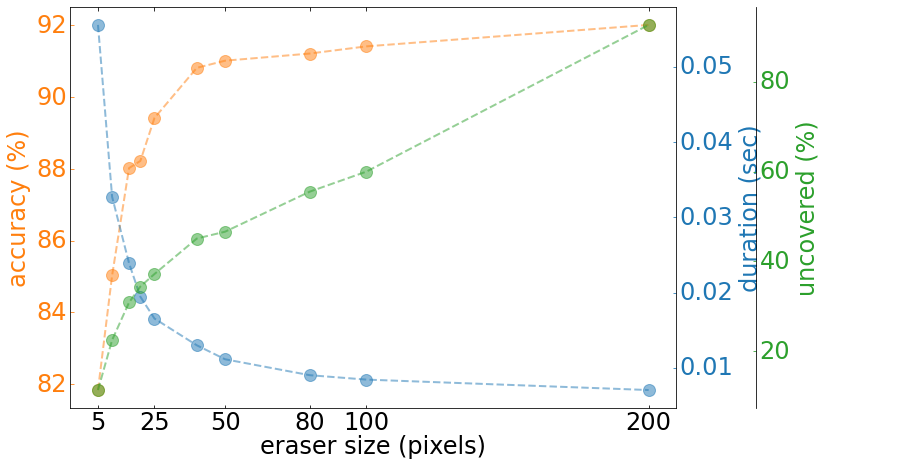

In [48]:
# https://matplotlib.org/gallery/api/two_scales.html
# https://matplotlib.org/examples/axes_grid/demo_parasite_axes2.html

# --------------------------------------------------------
# convert dict into lists
# --------------------------------------------------------
accuracy = [stats[key]['accuracy'] for key in stats.keys()]
duration = np.asarray([stats[key]['duration'] for key in stats.keys()]) / 1000
unmasked = [stats[key]['unmasked'] for key in stats.keys()]


ax1 = host_subplot(111, axes_class=AA.Axes)
# plt.subplots_adjust(right=0.75)

ax2 = ax1.twinx()
ax3 = ax1.twinx()

# --------------------------------------------------------
# plot first data points
# --------------------------------------------------------
# fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:orange'
# ax1.set_title('Accuracy, Percent Uncovered, and Task Duration \n as a Function of Eraser Size')
ax1.set_xlabel('eraser size (pixels)')
ax1.set_ylabel('accuracy (%)', color=color)

# set color of axes
# ax1.axis["left"].line.set_color(color)
ax1.axis["left"].major_ticks.set_color(color)
ax1.axis["left"].major_ticklabels.set_color(color)

ax1.plot(eraser_sizes, accuracy, color=color, marker='o', alpha=0.5,label='accuracy (%)',linestyle='dashed',linewidth=2, markersize=12)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks([5,25,50,80,100,200])
plt.setp(ax1.axis["bottom"].major_ticklabels, rotation=0)

    
# (optional) converting into percentage of canvase
# ax1.set_xticklabels(eraser_sizes ** 2 / (400 * 400) * 100)

# --------------------------------------------------------
# instantiate a second axes that shares the same x-axis
# --------------------------------------------------------
offset = 0
new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
ax2.axis["right"] = new_fixed_axis(loc="right", axes=ax2,
                                        offset=(offset, 0))

color = 'tab:blue'
ax2.set_ylabel('duration (sec)', color=color) 
ax2.plot(eraser_sizes, duration, color=color, marker='o', alpha=0.5, label='duration (sec)',linestyle='dashed',linewidth=2, markersize=12)
ax2.tick_params(axis='y', labelcolor=color)
# set color of axes
# ax2.axis["right"].line.set_color(color)
ax2.axis["right"].major_ticks.set_color(color)
ax2.axis["right"].major_ticklabels.set_color(color)

# --------------------------------------------------------
# instantiate a third axes that shares the same x-axis
# --------------------------------------------------------
offset = 80
new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
ax3.axis["right"] = new_fixed_axis(loc="right", axes=ax3,
                                        offset=(offset, 0))
color = 'tab:green'
ax3.set_ylabel('uncovered (%)', color=color)  
ax3.plot(eraser_sizes, unmasked, color=color, marker='o', alpha=0.5, label='uncovered (%)',linestyle='dashed',linewidth=2, markersize=12)
ax3.tick_params(axis='y', labelcolor=color)
# set color of axes
# ax3.axis["right"].line.set_color(color)
ax3.axis["right"].major_ticks.set_color(color)
ax3.axis["right"].major_ticklabels.set_color(color)

# --------------------------------------------------------
# PLOT
# --------------------------------------------------------
fig = plt.gcf()
fig.set_size_inches(12, 7)


# re-adjust figure otherwise the right y-label is slightly clipped
plt.tight_layout()  
plt.savefig('performance.pdf', format='pdf')
plt.show()

# Heat Map of Eraser size 10 Mouse Movements with MNIST Label 0 (For Paper)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


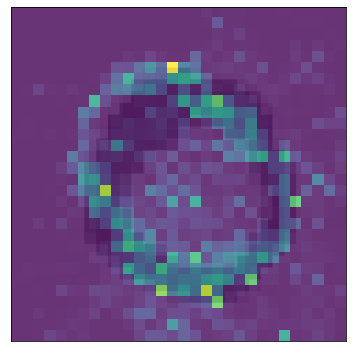

In [49]:
import matplotlib.image as mpimg
MNIST_label = 0

'''
The ones that look very good are 3 and 1
https://matplotlib.org/tutorials/colors/colormaps.html
https://moonbooks.org/Articles/How-to-create-a-2d-histogram-with-matplotlib-/

'''

eraser_10_correct = data_task[data_task.eraser_size==10][data_task.is_correct == True][data_task.actual_MNIST_label == MNIST_label]
numParticipants = len(eraser_10_correct.user_id.unique().tolist())
eraser10_ids = eraser_10_correct['unique_id'].tolist()
eraser10_mouseclick = mouse_positions_with_click_pd[mouse_positions_with_click_pd['task_id'].isin(eraser10_ids)]
eraser10_mousenoclick = mouse_positions_without_click_pd[mouse_positions_without_click_pd['task_id'].isin(eraser10_ids)]


heatmap, xedges, yedges = np.histogram2d(eraser10_mousenoclick['mouse_X'].tolist(),eraser10_mousenoclick['mouse_Y'].tolist(),bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


img = mpimg.imread('0.png')

f = plt.figure(figsize=(6, 10))
ax1 = f.add_subplot(1,1, 1)

plt.imshow(img, extent=extent,alpha = 0.5)
plt.imshow(heatmap.T,cmap="viridis", extent=extent, origin='lower',alpha = 0.8)
plt.xticks([])
plt.yticks([])

# f.suptitle("Heat Map of Mouse Movements", fontsize=16,horizontalalignment="center")
plt.show(block=True)
f.savefig("heatmap.jpg")